<a href="https://colab.research.google.com/github/rajan-dhinoja/Machine_Learning_Mastery/blob/main/Clustering_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# **Clustering Template**
---



# ***Step-A: Data Preprocessing:-***

## Step-1: Import Required Dependencies:-
Import essential libraries and modules for data manipulation, visualization, and preprocessing...

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re
import nltk
import warnings
warnings.filterwarnings('ignore')

# Set the option to prevent silent downcasting
np.set_printoptions(formatter={'float': '{:,.2f}'.format}, suppress=True, precision=2)
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('future.no_silent_downcasting', True)

print("✅ Required Libraries are Imported - Done!\n")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Required Libraries are Imported - Done!



## Step-2: Load the Dataset and Display Different overviews of Datasets:-

In [2]:
dataset = pd.DataFrame(pd.read_csv('/content/drive/MyDrive/Datasets/CLUSTERING/mall_customers.csv'))
dataset.drop(columns=['CustomerID'], inplace=True)

# dataset = pd.DataFrame(pd.read_csv('/content/drive/MyDrive/Datasets/CLUSTERING/online_retail/online_retail_1.csv'))
# dataset = pd.DataFrame(pd.read_csv('/content/drive/MyDrive/Datasets/CLUSTERING/online_retail/online_retail_2.csv'))
# dataset = pd.DataFrame(pd.read_csv('/content/drive/MyDrive/Datasets/CLUSTERING/crime_data.csv'))
# dataset = pd.DataFrame(pd.read_csv('/content/drive/MyDrive/Datasets/CLUSTERING/household_power_consumption.csv'))
# X = dataset.iloc[:, [3, 4]].values
dataset.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [3]:
# Seperate the whole datset into categorical and numerical columns...

categorical_cols = dataset.select_dtypes(include=['object']).columns
numerical_cols = dataset.select_dtypes(exclude=['object']).columns

if categorical_cols.empty:
  print("❌ No Categorical Columns Found...")
else:
  print("✅ Categorical Columns found: \n", categorical_cols, "\n")

if numerical_cols.empty:
  print("❌ No Numerical Columns Found...")
else:
  print("✅ Numerical Columns found: \n", numerical_cols)

✅ Categorical Columns found: 
 Index(['Genre'], dtype='object') 

✅ Numerical Columns found: 
 Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')


In [4]:
print("> Shape of the Dataset: ", dataset.shape, "\n")
print("> Information about Dataset:")
print(dataset.info(), "\n")
print("> Statistical summary of the Dataset:")
# print(dataset.describe().map(lambda x: round(x, 4)))
print(dataset.describe().to_string(header=True))

> Shape of the Dataset:  (200, 4) 

> Information about Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Genre                   200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB
None 

> Statistical summary of the Dataset:
         Age  Annual Income (k$)  Spending Score (1-100)
count 200.00              200.00                  200.00
mean   38.85               60.56                   50.20
std    13.97               26.26                   25.82
min    18.00               15.00                    1.00
25%    28.75               41.50                   34.75
50%    36.00               61.50                   50.00
75%    49.00             

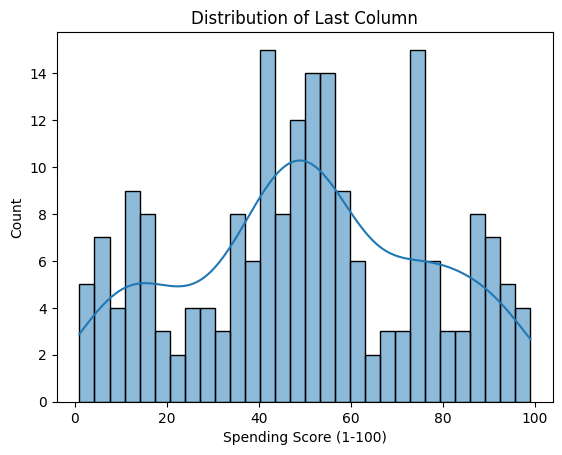

In [5]:
# plt.figure(figsize=(10, 6))
# Plot target distribution
sns.histplot(dataset.iloc[:, -1], bins=30, kde=True)
plt.title('Distribution of Last Column')
plt.show()

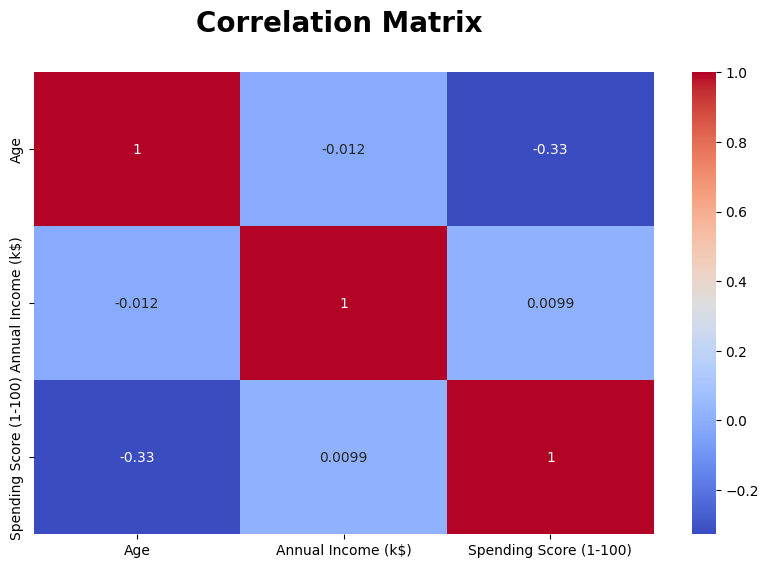

In [6]:
# Correlation Matrix Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(dataset[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix \n',fontsize=20,  fontweight=800)
plt.show()

## Step-3:- Checking the Dataset:-

### Step-3.1: Checking any Duplicate Data and Handling them:-

In [7]:
if dataset.duplicated().any():
  dataset.drop_duplicates(inplace=True)
  print("✅ Duplicate Data(or Identical Rows) found and Removed...")
else:
    print("❌ No Duplicate Data(or Identical Rows) found...")

❌ No Duplicate Data(or Identical Rows) found...


### Step-3.2: Cheking any Missing Data and Handling them:-

In [8]:
# Here from the module named impute of the library scikit-learn, we are using the SimpleImputer Class to Handle the Missing Values.
from sklearn.impute import SimpleImputer

missing_data_counts = dataset.isnull().sum() + dataset.isin(['', 'N/A', 'Unknown', 'NaN']).sum()

# if dataset.isnull().values.any() or dataset.isin(['', 'NaN', 'N/A', 'Unknown']).any().any():
if missing_data_counts.any():

  categorical_missing_counts = dataset[categorical_cols].isnull().sum() + dataset[categorical_cols].isin(['', 'N/A', 'Unknown', 'NaN']).sum()
  numerical_missing_counts = dataset[numerical_cols].isnull().sum()

  # Replace "Unknown" with NaN in categorical columns
  for col in categorical_cols:
    dataset[col] = dataset[col].replace('Unknown', np.nan)


  # Check if there are any missing values (categorical or numerical)
  if categorical_missing_counts.any() or numerical_missing_counts.any():
      # Print missing counts for categorical columns in the desired format
      print("⚠️ Missing Data Found! Handling them...\n")
      print("Missing Data Counts in Categorical Columns: \n", categorical_missing_counts)
      print("\n")
      print("Missing Data Counts in Numerical Columns: \n", numerical_missing_counts)
      print("\n")

      # Create imputers for categorical and numerical features
      categorical_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
      numerical_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

      # Apply imputers to the selected columns in X
      if len(categorical_cols) > 0:
        categorical_cols_for_impution = [col for col in categorical_cols if col != dataset.columns[-1]]
        dataset[categorical_cols_for_impution] = categorical_imputer.fit_transform(dataset[categorical_cols_for_impution])

      # Exclude the dependent variable column (last column) if it's numerical
      numerical_cols_for_impution = [col for col in numerical_cols if col != dataset.columns[-1]]
      if len(numerical_cols_for_impution) > 0:
          dataset[numerical_cols_for_impution] = numerical_imputer.fit_transform(dataset[numerical_cols_for_impution])
      # if len(numerical_cols) > 0:
          # dataset[numerical_cols] = numerical_imputer.fit_transform(dataset[numerical_cols])
      print("✅ Missing Data Handled Successfully...")
      # print("New Data with replaced missing values: \n", dataset.head(10).to_string(header=True))
else:
    print("❌ No missing data found...")



❌ No missing data found...


### Step-3.3: Checking any Synonyms or Aliases and Handling them:-

In [9]:
# for col in dataset.columns:
#   value_counts_dataset = dataset[col].value_counts().rename_axis('Unique Values: ').reset_index(name='Counts: ')

#   print(f"Column: \t\t'{col}'")
#   print(value_counts_dataset.T.to_string(header=False), "\n")

### Step-3.4: Checking for Stopwords and Stemming them:-

In [10]:
# from nltk.corpus import stopwords
# from nltk.stem.porter import PorterStemmer

# if categorical_cols.any():
#   nltk.download('stopwords')
#   stop_words = set(stopwords.words('english'))
#   # stop_words = stop_words.remove('not')
#   # print("\n Stop Words are: ", stop_words, "\n")
#   def stemming(text):
#       words = text.lower().split()

#       stemmer = PorterStemmer()
#       stemmed_words = [stemmer.stem(word) for word in words if word not in stop_words]
#       return ' '.join(stemmed_words)  # Join stemmed words back into a string

#   # Apply the stemming function to the specified columns
#   for column in categorical_cols:
#       dataset[column] = dataset[column].astype(str).apply(stemming)

#   print("✅ Stemming Completed Successfully... \n")
#   # print(dataset.head().to_string(header=True))
# else:
#   print("❌ No Stemming Needed...")

### Step-3.5: Checking any Categorical Data and Encoding them:-

In [11]:
import scipy.sparse
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# X = dataset.iloc[:, 1:-1]
# X = dataset.iloc[:, :-1]
# y = dataset.iloc[:, -1].values

repeating_cols = []

if categorical_cols.empty:
  print(f"\t❌ No Encoding needed! No Categorical values found in whole Dataset.\n")
else:
  for col in categorical_cols:
      print(f"> String Values present in Column '{col}'.")
      # Check for repeating values within the categorical column
      value_counts = dataset[col].value_counts()
      repeating_values = value_counts[value_counts > 1].index.tolist()
      if repeating_values:
        repeating_cols.append(col)
        # print(f"\t- Also, Categorical values found in column '{col}': {repeating_values}.")
        print(f"\t- Also, Categorical values found in column '{col}'.")
        print(f"\t✅ '{col}' is Encoded Successfully...\n")
      else:
        print(f"\t❌ But No Categorical values found in column '{col}'.\n")

  print("=> Repeating Columns in Matrix of Features(X): ", repeating_cols, "\n")
  if repeating_cols:

    """ OneHotEncoding: """
    # onehot_encoder = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), repeating_cols)], remainder='passthrough')
    # encoder_transform = onehot_encoder.fit_transform(dataset)
    # # Conditional conversion to dense array
    # if scipy.sparse.issparse(encoder_transform):  # Check if sparse
    #   dataset = encoder_transform.toarray()
    # else:
    #   dataset = encoder_transform


    """ LabelEncoding: """
    label_encoder = LabelEncoder()
    for col in repeating_cols:
      dataset[col] = label_encoder.fit_transform(dataset[col])

  else:
    print("❌ No Repeating Columns found in Matrix of Features(X). \n")

  # print("Matrix of Features(X): \n", pd.DataFrame(X).head().to_string(header=True))
  # print("\n")
  # print("Dependent Variable(y): \n", pd.DataFrame(y).head().to_string(header=False, index=False))


> String Values present in Column 'Genre'.
	- Also, Categorical values found in column 'Genre'.
	✅ 'Genre' is Encoded Successfully...

=> Repeating Columns in Matrix of Features(X):  ['Genre'] 



## Step-4: Split the Dataset into the Training set and Test set:-

In [12]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# print("✅ Data Splitted Successfully...\n")
# # print("Printing Training Sets: ")
# # print("> X_train: \n", (pd.DataFrame(X_train).head()).to_string(), "\n")
# # print("> X_test: \n", (pd.DataFrame(X_test).head()).to_string(), "\n")
# # print("\n")
# # print("Printing Test Sets: ")
# # print("> y_train: \n", (pd.DataFrame(y_train).head()).to_string(header=False), "\n")
# # print("> y_test: \n", (pd.DataFrame(y_test).head()).to_string(header=False), "\n")

## Step-5: Feature Scaling:-

In [13]:
from sklearn.preprocessing import StandardScaler

# 1. Create a copy for scaling:
X_scaled = dataset.copy()

# 2. Create a StandardScaler object
scaler = StandardScaler()

# 3. Select columns for scaling (exclude columns with only 0 and 1)
cols_to_scale = []
for col in X_scaled.columns:
    if not np.all(np.isin(X_scaled[col], [0, 1])):
        cols_to_scale.append(col)

# 4. Apply scaling to selected columns in X_scaled
X_scaled[cols_to_scale] = scaler.fit_transform(X_scaled[cols_to_scale])

print("✅ Feature Scaling is Done Successfully...\n")
print(X_scaled.head().to_string())

# Now, X_scaled holds the scaled features, similar to how 'X' was used before.

✅ Feature Scaling is Done Successfully...

   Genre   Age  Annual Income (k$)  Spending Score (1-100)
0      1 -1.42               -1.74                   -0.43
1      1 -1.28               -1.74                    1.20
2      0 -1.35               -1.70                   -1.72
3      0 -1.14               -1.70                    1.04
4      0 -0.56               -1.66                   -0.40


# ***Step-B: Model Builing & Evaluation...***

## Step-1: Find Optimal Clusters using Elbow Method:-

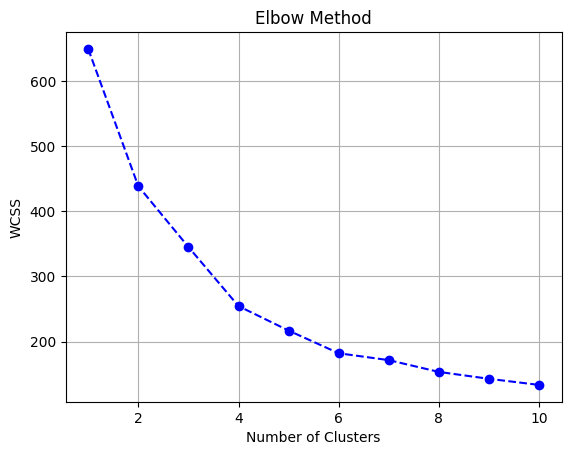

In [14]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow Graph
# plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='b')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

## Step-2: Model Building & Evaluation:-

In [15]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.cluster.hierarchy import dendrogram, linkage

models = [
    KMeans(n_clusters=5, random_state=42),
    DBSCAN(eps=0.5, min_samples=5),
    AgglomerativeClustering(n_clusters=5),
    GaussianMixture(n_components=5, random_state=42)
]

for model in models:
  y_pred = model.fit_predict(X_scaled)
  # print(y_pred)

  if len(set(y_pred)) > 1:  # Ensure more than one cluster
      silhouette = silhouette_score(X_scaled, y_pred)
      db_index = davies_bouldin_score(X_scaled, y_pred)
      calinski = calinski_harabasz_score(X_scaled, y_pred)

      print(f"✅ {model.__class__.__name__} is trained Sucessfully...")
      print(f"-> {model.__class__.__name__}:-")
      print(f"\t Silhouette Score:\t\t  {silhouette:.4f}")
      print(f"\t Davies-Bouldin Index:\t  {db_index:.4f}")
      print(f"\t Calinski-Harabasz Index: {calinski:.4f}\n")
  else:
      print(f"{model.__class__.__name__}: Not enough clusters for evaluation\n")


✅ KMeans is trained Sucessfully...
-> KMeans:-
	 Silhouette Score:		  0.3498
	 Davies-Bouldin Index:	  1.0245
	 Calinski-Harabasz Index: 97.2583

✅ DBSCAN is trained Sucessfully...
-> DBSCAN:-
	 Silhouette Score:		  -0.0114
	 Davies-Bouldin Index:	  1.5008
	 Calinski-Harabasz Index: 10.8906

✅ AgglomerativeClustering is trained Sucessfully...
-> AgglomerativeClustering:-
	 Silhouette Score:		  0.3478
	 Davies-Bouldin Index:	  1.0686
	 Calinski-Harabasz Index: 91.2778

✅ GaussianMixture is trained Sucessfully...
-> GaussianMixture:-
	 Silhouette Score:		  0.3323
	 Davies-Bouldin Index:	  1.0383
	 Calinski-Harabasz Index: 90.2808



## Step-3: Visulising the Clusters:-

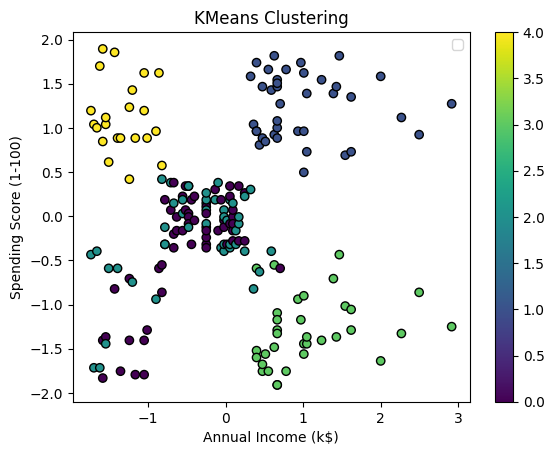

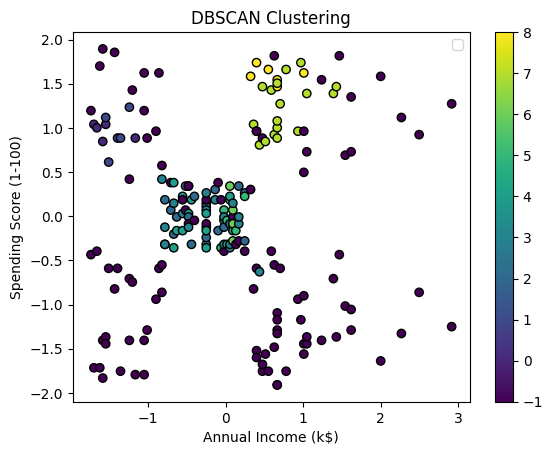

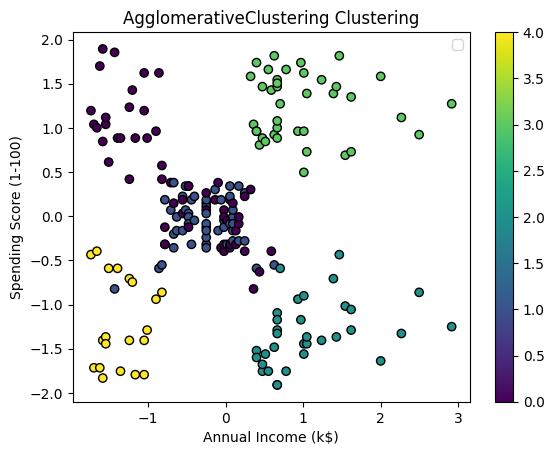

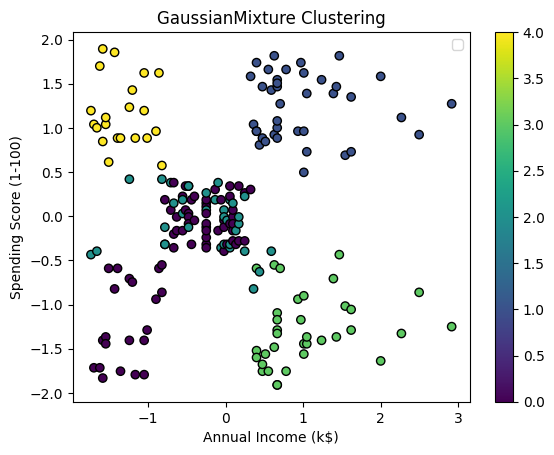

In [16]:
def plot_clusters(X_scaled, y_pred, model_name):
  # plt.figure(figsize=(12, 8))

  # colors = ['red', 'yellow', 'green', 'cyan', 'magenta']
  # for i in range(0, 5):
  #   plt.scatter(X_scaled[y_kmeans == i, 0], X_scaled[y_kmeans == i, 1], s = 100, c = colors[i], label = f'Cluster {i+1}')
  # plt.scatter(final_kmeans.cluster_centers_[:, 0], final_kmeans.cluster_centers_[:, 1], s=300, c='blue', label='Centroids')

  scatter = plt.scatter(X_scaled.iloc[:, 2], X_scaled.iloc[:, 3], c=y_pred, cmap='viridis', edgecolors='k')

  plt.xlabel("Annual Income (k$)")
  plt.ylabel("Spending Score (1-100)")
  plt.title(f"{model_name} Clustering")
  plt.colorbar(scatter)
  plt.legend()
  plt.show()

for model in models:
  y_pred = model.fit_predict(X_scaled)
  plot_clusters(X_scaled, y_pred, model.__class__.__name__)
  print("\n")

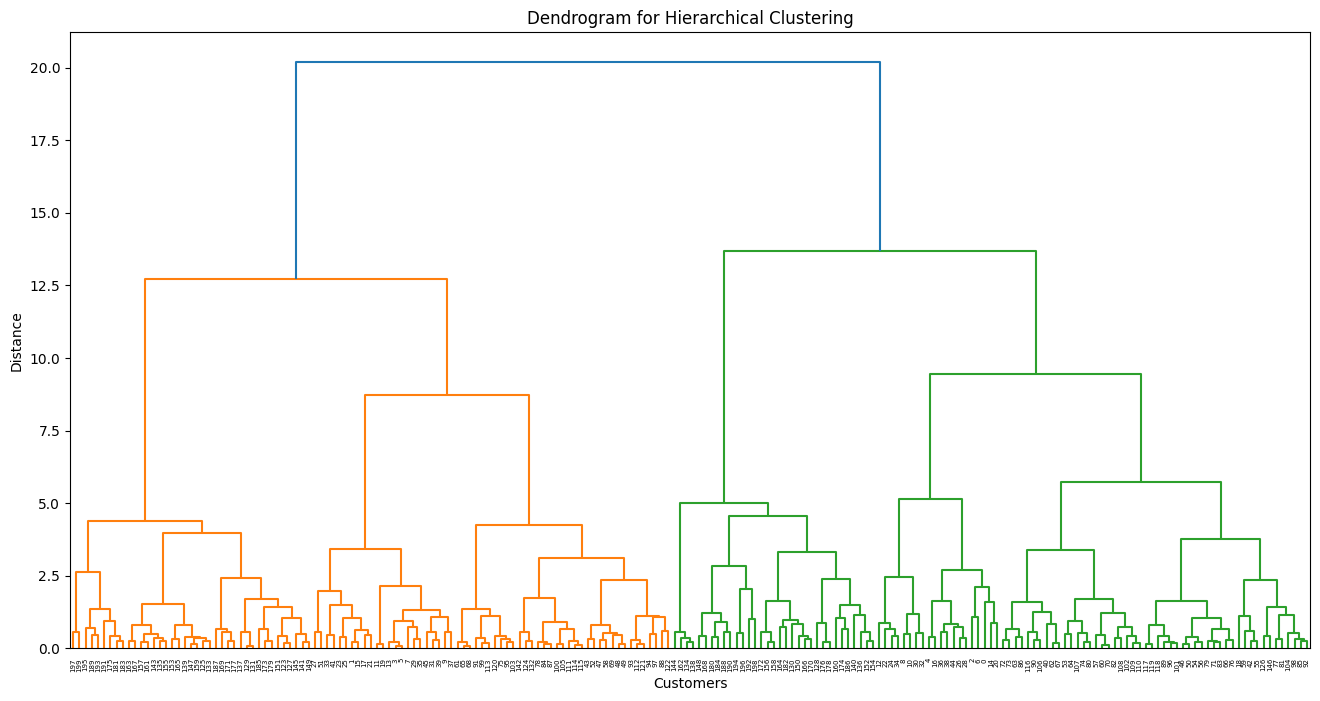

In [17]:
plt.figure(figsize=(16, 8))

linkage_matrix = linkage(X_scaled, method='ward')
dendrogram(linkage_matrix)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Customers")
plt.ylabel("Distance")
plt.show()

# ***Step-C: Saving the Model & Testing It...***

## Step-1: Saving the Model(.sav):-

In [18]:
import pickle
for model in models:
    # Save each model with its name
    model_filename = f"{model.__class__.__name__}.sav"
    pickle.dump(model, open(model_filename, "wb"))

    print(f"✅ Model saved: {model_filename}")

✅ Model saved: KMeans.sav
✅ Model saved: DBSCAN.sav
✅ Model saved: AgglomerativeClustering.sav
✅ Model saved: GaussianMixture.sav


## Step-2: Predicting and Testing the Model:-

In [19]:
# correct_predictions = 0
# max_correct_predictions = 0
# model_predictions = {} # dictionary to store model and their correct predictions

# random_input = np.random.randint(2, 5)
# # random_input = np.random.randint(2, 10)
# print("Number of Inputs for Predction: ", random_input, "\n")

# for i in range(random_input):

#   sample_input = pd.DataFrame(X_train).iloc[i].values.reshape(1, -1)  # Convert a row to an array
#   sample_output = round(y_train[i], 2)

#   print("Before Predicting, Sample Data & Output Sales are:-")
#   print("> Sample Data: ", sample_input)
#   print("> Output: ",sample_output, "\n")

#   for model in models:
#     model = pickle.load(open(f"{model.__class__.__name__}.sav", "rb"))
#     model_filename = f"{model.__class__.__name__}.sav"
#     print(f"-> {model.__class__.__name__}:-")

#     prediction = model.predict(sample_input)
#     # print(" - Predicted Sales:", prediction[0])
#     rounded_prediction = round(prediction[0], 2)
#     print(f" - Predicted Sales: {rounded_prediction:.2f}")

#     if rounded_prediction == sample_output:
#         correct_predictions += 1
#         print("\t✅ Nice Work! your Prediction is correct...\n")
#         # increment correct prediction count for the model in the dictionary
#         model_predictions[model.__class__.__name__] = model_predictions.get(model.__class__.__name__, 0) + 1
#     else:
#         print("\t❌ Oops! your Prediction is incorrect...\n")

#   print("="*75, "\n")

## Step-3: Selecting the Perfect Model for this Dataset:-

In [20]:
# # Instead of using max, we'll iterate and check for perfect predictions
# best_models = []  # List to store all perfectly predicting models

# for model_name, correct_count in model_predictions.items():
#     if correct_count == random_input:  # Assuming you're testing on 5 samples
#         best_models.append(model_name)

# # Print the results
# if best_models:
#     print("The following Models achieved all perfect Predictions:")
#     for model_name in best_models:
#       print(f"\t- ✅ '{model_name}:\n\t\t\t\t with '{model_predictions[model_name]}' correct predictions")
# else:
#     print("No models achieved perfect predictions on all samples.")

In [21]:
# # Instead of using max, we'll iterate and check for at least one correct prediction
# models_with_correct_predictions = []  # List to store models with at least one correct prediction

# for model_name, correct_count in model_predictions.items():
#     if correct_count >= 1:  # Check for at least one correct prediction
#         models_with_correct_predictions.append(model_name)

# # Print the results
# if models_with_correct_predictions:
#     print("The following Models achieved at least one correct Prediction:")
#     for model_name in models_with_correct_predictions:
#         print(f"\t- ✅ '{model_name}':\n\t\t\t '{model_predictions[model_name]}' out of {random_input} correct predictions")
# else:
#     print("No models achieved any correct predictions on the samples.")